In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
from scipy.optimize import curve_fit
import sympy as sp
%matplotlib inline

In [38]:
rc('font', family='Comic Sans MS')
Neon = pd.read_csv("Neon.csv")
stopien = np.pi/180
minuta = stopien/60
alpha_0 = 45*stopien +30*minuta
Na_zolte = 346*stopien + 50*minuta
Na_zielone = 145*stopien+ 30*minuta
D_miarki = 2*minuta
D_obserwatora = 2*minuta
D_kat = np.sqrt(D_katomierza**2+D_obserwatora**2)
AL = 176*stopien
AP = 56*stopien
kat_lamiacy = (AL - AP)/2
D_kat_lamiacy = np.sqrt(2)*D_kat/2

In [55]:
print(Neon.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  lambda[nm] &  alpha[circ] &  alpha[min] \\
\midrule
0  &         654 &          348 &          18 \\
1  &         651 &          348 &          10 \\
2  &         641 &          348 &           0 \\
3  &         614 &          347 &          46 \\
4  &         610 &          347 &          40 \\
5  &         603 &          347 &          26 \\
6  &         591 &          347 &          10 \\
7  &         588 &          347 &           0 \\
8  &         540 &          346 &          20 \\
9  &         534 &          346 &          10 \\
10 &         470 &          345 &          48 \\
11 &         454 &          344 &          44 \\
\bottomrule
\end{tabular}



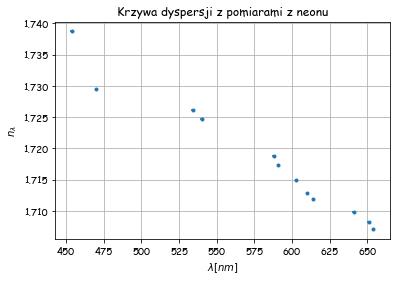

In [54]:
Neon_kat =2*np.pi - (Neon['alpha[circ]']*stopien+Neon['alpha[min]']*minuta-alpha_0)
D_neon_kat = D_kat_lamiacy
n_neon = np.sin((Neon_kat+kat_lamiacy)/2)/np.sin(kat_lamiacy/2)
plt.errorbar(Neon['lambda[nm]'],n_neon,0,1,'.')
plt.xlabel(r'$\lambda[nm]$'); plt.ylabel(r'$n_{\lambda}$'); plt.grid(); plt.title('Krzywa dyspersji z pomiarami z neonu')
plt.savefig('dyspersja.png')

In [47]:
zmienne = kat_lamiacy_analityczne, Neon_kat_analityczne = sp.symbols('phi, epsilon_0')
wartosci = {kat_lamiacy_analityczne: kat_lamiacy, Neon_kat_analityczne: Neon_kat}
niepewnosci = {kat_lamiacy_analityczne: D_kat_lamiacy, Neon_kat_analityczne: D_neon_kat}

n_analitycznie = sp.sin((Neon_kat_analityczne+kat_lamiacy_analityczne)/2)/sp.sin(kat_lamiacy_analityczne/2)
sp.pprint(n_analitycznie)
#Więc tutaj nie chce wpisać wartości do macierzy, do poprawienia
cala_delta_n = np.zeros((1,12))
wklad_od_obecnej_zmiennej = np.zeros((1,12))
for zmienna in zmienne:
    pochodna = n_analitycznie.diff(zmienna).simplify()
    sp.pprint((zmienna, pochodna))
    wklad_od_obecnej_zmiennej = (pochodna.subs(wartosci)*niepewnosci[zmienna])**2
    print(wklad_od_obecnej_zmiennej)
    cala_delta_n += wklad_od_obecnej_zmiennej
cala_delta_n **= 0.5
print(cala_delta_n)

⎛       ⎛ε₀⎞  ⎞
⎜    sin⎜──⎟  ⎟
⎜       ⎝2 ⎠  ⎟
⎜φ, ──────────⎟
⎝   cos(φ) - 1⎠


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().